<h2><b>[개인 과제]</b></h2>

````
# 미국 Boston 지역의 집값 data 불러오기
import pandas as pd
house = pd.read_csv('https://raw.githubusercontent.com/rasbt/'
                     'python-machine-learning-book-2nd-edition'
                     '/master/code/ch10/housing.data.txt',header=None,sep='\s+')
house.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS','NOX', 'RM', 'AGE', 'DIS', 'RAD','TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
house.head()
````


<h3>Ridge, Lasso, ElasticNet을 사용해 alpha의 값 변화에 따른 MEDV를 예측하는 변수들의 계수 변화를 시각화해보세요.</h3>

[<h3>참고 코드</h3>](https://datascienceschool.net/03%20machine%20learning/06.05%20%EC%A0%95%EA%B7%9C%ED%99%94%20%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80.html)



<br>

**<h3><조건></h3>**

<h3>1. X(독립변수 data)에 Standard Scaler 적용하기 </h3>

<br>

**<h3><참고></h3>**

<h3>Ridge와 Lasso에서 상수항이 축소되지 않는 이유</h3>

[<h3>참고 블로그</h3>](https://rpago.tistory.com/59)


In [ ]:
# The normal imports
import numpy as np # efficient numerical computations
import pandas as pd # data structures for data analysis
from numpy.random import randn

# These are the plotting modules adn libraries
import matplotlib as mpl # plotting (both interactive and to files)
import matplotlib.pyplot as plt
import seaborn as sns # extra plot types, elegant and readable plot style

# machine learning algorithms, dataset access
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, MaxAbsScaler
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, r2_score, mean_squared_error
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression, RANSACRegressor, ElasticNet, Ridge, Lasso

sns.set_style('whitegrid')

# Command so that plots appear in the iPython Notebook
get_ipython().run_line_magic('matplotlib', 'inline')

In [ ]:
# 미국 Boston 지역의 집값 data 불러오기
import pandas as pd
house = pd.read_csv('https://raw.githubusercontent.com/rasbt/'
                     'python-machine-learning-book-2nd-edition'
                     '/master/code/ch10/housing.data.txt',header=None,sep='\s+')
house.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS','NOX', 'RM', 'AGE', 'DIS', 'RAD','TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
house.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:
# 독립 변수, 종속 변수 지정
house_column = house.columns.to_list()
scale_columns = ['CRIM', 'ZN', 'INDUS','NOX', 'RM', 'AGE', 'DIS','TAX', 'PTRATIO', 'B', 'LSTAT']
X = house[scale_columns]
y = house['MEDV']

# 정규화(전체 dataset에 대해 Scaling 진행.)
scaler1 = StandardScaler()

# X = scaler1.fit_transform(house[scale_columns]) 이렇게 하면 scaling 안한 변수 2개 날라갑니다..ㅎㅎ
house[scale_columns]=scaler1.fit_transform(house[scale_columns]) 
house.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.419782,0.284830,-1.287909,0,-0.144217,0.413672,-0.120013,0.140214,1,-0.666608,-1.459000,0.441052,-1.075562,24.0
1,-0.417339,-0.487722,-0.593381,0,-0.740262,0.194274,0.367166,0.557160,2,-0.987329,-0.303094,0.441052,-0.492439,21.6
2,-0.417342,-0.487722,-0.593381,0,-0.740262,1.282714,-0.265812,0.557160,2,-0.987329,-0.303094,0.396427,-1.208727,34.7
3,-0.416750,-0.487722,-1.306878,0,-0.835284,1.016303,-0.809889,1.077737,3,-1.106115,0.113032,0.416163,-1.361517,33.4
4,-0.412482,-0.487722,-1.306878,0,-0.835284,1.228577,-0.511180,1.077737,3,-1.106115,0.113032,0.441052,-1.026501,36.2


In [ ]:
X = house[house_column[0:-1]] # 정규화 안한 독립변수 2개까지 포함하기..! (총 13개)
y = house['MEDV']
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419782,0.284830,-1.287909,0,-0.144217,0.413672,-0.120013,0.140214,1,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,0,-0.740262,0.194274,0.367166,0.557160,2,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,0,-0.740262,1.282714,-0.265812,0.557160,2,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,0,-0.835284,1.016303,-0.809889,1.077737,3,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,0,-0.835284,1.228577,-0.511180,1.077737,3,-1.106115,0.113032,0.441052,-1.026501


In [ ]:
# alpha 값에 따른 계수 변화(Ridge)
alpha = np.logspace(-3, 1, 5)

data = []
for i, a in enumerate(alpha):
    ridge = Ridge(alpha=a).fit(X, y)
    data.append(pd.Series(np.hstack([ridge.coef_])))

df_ridge = pd.DataFrame(data, index=alpha).T
df_ridge

,0.001,0.010,0.100,1.000,10.000
0,-0.928144,-0.928126,-0.927943,-0.926107,-0.907617
1,1.081556,1.081441,1.080299,1.069023,0.969933
2,0.140888,0.140778,0.139680,0.128822,0.032357
3,2.686659,2.685981,2.679226,2.613723,2.113063
4,-2.056693,-2.056465,-2.054188,-2.031713,-1.832621
5,2.674237,2.674295,2.674880,2.680612,2.727648
6,0.019463,0.019439,0.019191,0.016714,-0.007034
7,-3.104018,-3.103777,-3.101372,-3.077541,-2.859351
8,0.306046,0.306017,0.305729,0.302873,0.277075
9,-2.076754,-2.076507,-2.074039,-2.049657,-1.834553


In [ ]:
# alpha 값에 따른 계수 변화(Lasso)
alpha = np.logspace(-3, 1, 5)

data = []
for i, a in enumerate(alpha):
    lasso = Lasso(alpha=a).fit(X, y)
    data.append(pd.Series(np.hstack([lasso.coef_])))

df_lasso = pd.DataFrame(data, index=alpha).T
df_lasso

,0.001,0.010,0.100,1.000,10.000
0,-0.926444,-0.911187,-0.744328,-0.000000,-0.000000
1,1.077214,1.039957,0.732082,0.000000,0.000000
2,0.133515,0.067040,-0.000000,-0.000000,-0.000000
3,2.674441,2.561624,1.288893,0.000000,0.000000
4,-2.048868,-1.984111,-1.551736,-0.000000,-0.000000
5,2.675529,2.684189,2.783236,2.827515,0.000000
6,0.015666,0.000000,-0.000000,-0.000000,-0.000000
7,-3.100300,-3.060521,-2.485439,-0.000000,0.000000
8,0.304823,0.294040,0.214650,-0.076727,-0.270937
9,-2.065864,-1.968588,-1.397968,-0.000000,-0.000000


In [ ]:
# alpha 값에 따른 계수 변화(ElasticNet)
data = []
for i, a in enumerate(alpha):
    elasticnet = ElasticNet(alpha=a).fit(X, y)
    data.append(pd.Series(np.hstack([elasticnet.coef_])))

df_elasticnet = pd.DataFrame(data, index=alpha).T
df_elasticnet

,0.001,0.010,0.100,1.000,10.000
0,-0.926781,-0.914539,-0.793490,-0.261985,-0.000000
1,1.076193,1.029999,0.723419,0.063979,0.000000
2,0.134139,0.075260,-0.056787,-0.210157,-0.000000
3,2.661729,2.452317,1.213440,0.000000,0.000000
4,-2.046418,-1.958562,-1.419890,-0.144404,-0.000000
5,2.676515,2.695030,2.807520,2.410410,0.130751
6,0.016874,0.000000,-0.000000,-0.000000,-0.000000
7,-3.095425,-3.017645,-2.276360,-0.000000,0.000000
8,0.304629,0.292309,0.208620,-0.061874,-0.309827
9,-2.064422,-1.957604,-1.356796,-0.107007,-0.000000


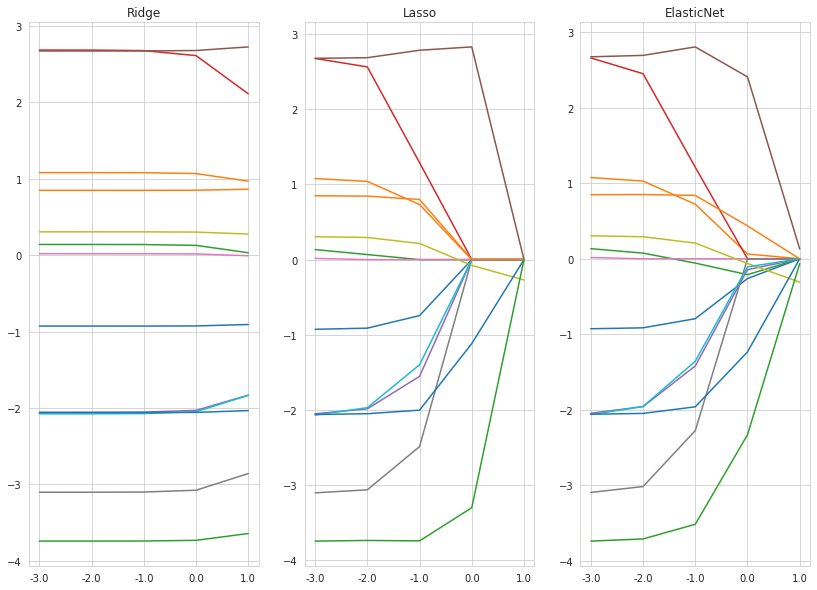

In [ ]:
# 시각화
fig = plt.figure(figsize=(14,10))


ax1 = plt.subplot(131)
plt.semilogx(df_ridge.T)
plt.xticks(alpha, labels=np.log10(alpha))
plt.title("Ridge")

ax2 = plt.subplot(132)
plt.semilogx(df_lasso.T)
plt.xticks(alpha, labels=np.log10(alpha))
plt.title("Lasso")

ax3 = plt.subplot(133)
plt.semilogx(df_elasticnet.T)
plt.xticks(alpha, labels=np.log10(alpha))
plt.title("ElasticNet")

plt.show()